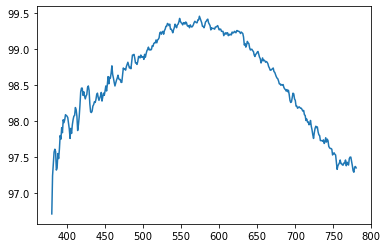

In [18]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

wl = np.linspace(380, 780, 401)
air = ml.Non_Dispersion(1)
SiO2 = ml.open_material('SiO2_Nanya', 'Material')
NB = ml.open_material('Nb2O5_Nanya', 'Material')
ITO2 = ml.open_material('ITO_Nanya', 'Material')
sodalime_Nanya = ml.open_material('sodalime_Nanya', 'Material')

R_scan = pd.read_csv('./spectrum/Nanya/Bonsai_R_5_2nd.csv')['SCAN'].values
T_scan = pd.read_csv('./spectrum/Nanya/Bonsai_T_0.csv')['SCAN'].values

R_hypo = lambda th:tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
)

R_hypo_sec = lambda th: tm.sec_reflec(R_hypo(th), wl, 5)

def RMSE(hypo, target,n):
    return (sum((hypo-target)**2)/n)**.5

FOM = lambda th: RMSE(
    100*R_hypo_sec(th),R_scan, 401
)

plt.plot(wl, R_scan+T_scan)
plt.show()

In [14]:
sol = differential_evolution(
    FOM, [
        (65, 80), (23,32), (35, 50),(4,12)
    ],
    disp = True, 
    polish = False, 
    popsize = 15, 
    mutation = 0.5, 
    recombination = 1, 
    strategy = 'best1exp'
)
print(sol.x)

differential_evolution step 1: f(x)= 0.419297
differential_evolution step 2: f(x)= 0.419297
differential_evolution step 3: f(x)= 0.387544
differential_evolution step 4: f(x)= 0.348373
differential_evolution step 5: f(x)= 0.344399
differential_evolution step 6: f(x)= 0.343174
differential_evolution step 7: f(x)= 0.343174
differential_evolution step 8: f(x)= 0.339322
differential_evolution step 9: f(x)= 0.339322
differential_evolution step 10: f(x)= 0.339322
differential_evolution step 11: f(x)= 0.338573
differential_evolution step 12: f(x)= 0.337619
differential_evolution step 13: f(x)= 0.337619
[65.00370299 23.00167371 45.50631174  4.23735527]


0.33761881281688155


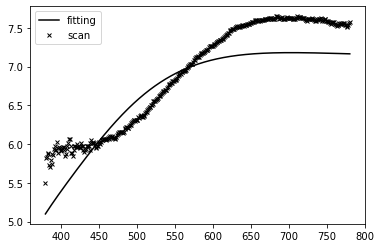

In [15]:
tk = sol.x
plt.plot(wl, 100*R_hypo_sec(tk), '-k', label = 'fitting')
plt.plot(wl, R_scan, 'kx', label = 'scan', markersize = 4)
plt.legend(loc = 'best')
print(RMSE(100*R_hypo_sec(tk),R_scan, 401))
plt.show()